In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [2]:
data=pd.read_csv('ToyotaCorolla.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


##### There is no null values in this data 

In [4]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
data['Cylinders'].nunique()

1

#### Here we are dropping cylinder column because all are having same number

In [7]:
data.drop(columns=['Cylinders'],inplace=True)

#### Checking the duplicates

In [8]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,5,1320


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(1435, 10)

#### checking for column names

In [12]:
data.rename(columns={'Age_08_04':'Age'},inplace=True)

In [13]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [14]:
data.agg('mean',numeric_only=True)

Price        10720.915679
Age             55.980488
KM           68571.782578
HP             101.491986
Automatic        0.055749
cc            1576.560976
Doors            4.032753
Gears            5.026481
Weight        1072.287108
dtype: float64

In [15]:
data_new=data.copy()

##### here the average for each column

##### In Fuel type data is in object so we convert the column into integer type 

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
model=LabelEncoder()

In [18]:
Label=model.fit_transform(data['Fuel_Type'])

In [19]:
Label

array([1, 1, 1, ..., 2, 2, 2])

In [20]:
data['Fuel_Type']=Label

In [21]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


#### Visualization

#### Histogram

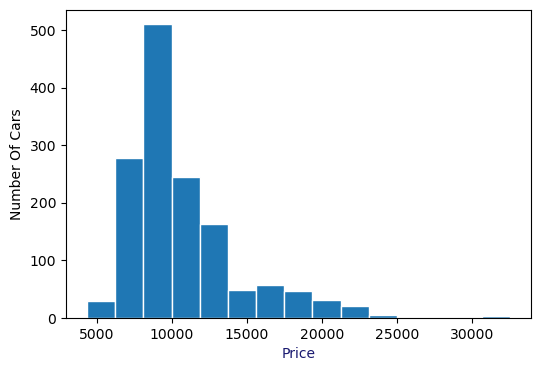

In [22]:
plt.figure(figsize=(6,4))
plt.xlabel('Price',fontsize=10,color='midnightblue')
plt.ylabel('Number Of Cars',fontsize=10)
plt.hist(data['Price'],bins=15,edgecolor='white')
plt.show()

##### Around 500 cars are with 8000 to 9000 price Range

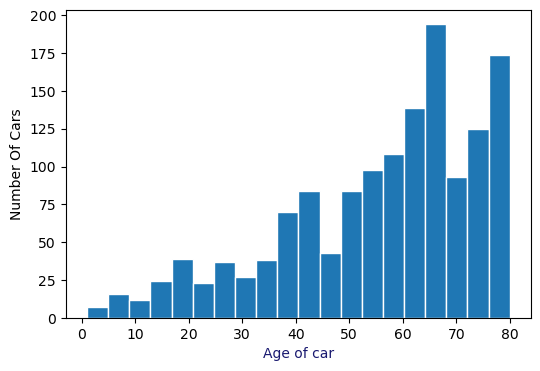

In [23]:
plt.figure(figsize=(6,4))
plt.xlabel('Age of car',fontsize=10,color='midnightblue')
plt.ylabel('Number Of Cars',fontsize=10)
plt.hist(data['Age'],bins=20,edgecolor='white')
plt.show()

#### here we are getting how many cars having how much age

#### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x21170976b10>,
 'caps': [<matplotlib.lines.Line2D at 0x211714f69c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x211714f6600>],
 'medians': [<matplotlib.lines.Line2D at 0x211714f6fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x211714f7260>],
 'means': []}

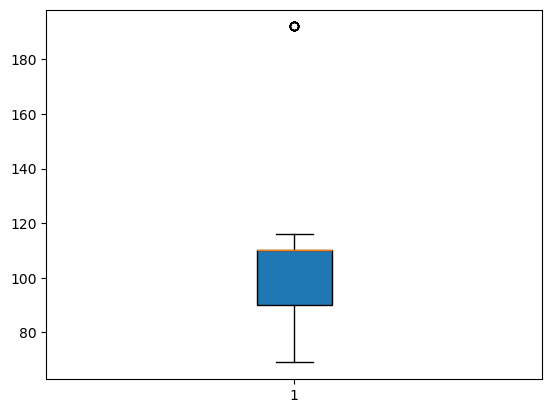

In [24]:
plt.boxplot(data['HP'],patch_artist=True)

In [25]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [26]:
data[data['HP']==192]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
8,21500,27,19700,2,192,0,1800,3,5,1185
10,20950,25,31461,2,192,0,1800,3,6,1185
11,19950,22,43610,2,192,0,1800,3,6,1185
12,19600,25,32189,2,192,0,1800,3,6,1185
13,21500,31,23000,2,192,0,1800,3,6,1185
14,22500,32,34131,2,192,0,1800,3,6,1185
15,22000,28,18739,2,192,0,1800,3,6,1185
16,22750,30,34000,2,192,0,1800,3,5,1185
49,21950,31,64982,2,192,0,1800,5,6,1195
53,21950,27,49866,2,192,0,1800,5,5,1195


{'whiskers': [<matplotlib.lines.Line2D at 0x21170dc3a70>,
 'caps': [<matplotlib.lines.Line2D at 0x21170dc19d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21170e2b590>],
 'medians': [<matplotlib.lines.Line2D at 0x21170dc3230>],
 'fliers': [<matplotlib.lines.Line2D at 0x21170dc2e10>],
 'means': []}

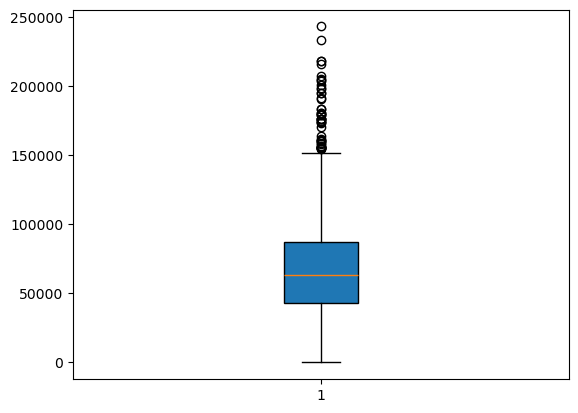

In [27]:
plt.boxplot(data['KM'],patch_artist=True)

#### here we get so many outliers it distort model performance

{'whiskers': [<matplotlib.lines.Line2D at 0x2117152dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x2117152e270>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2117152d9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2117152e6f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2117152e9c0>],
 'means': []}

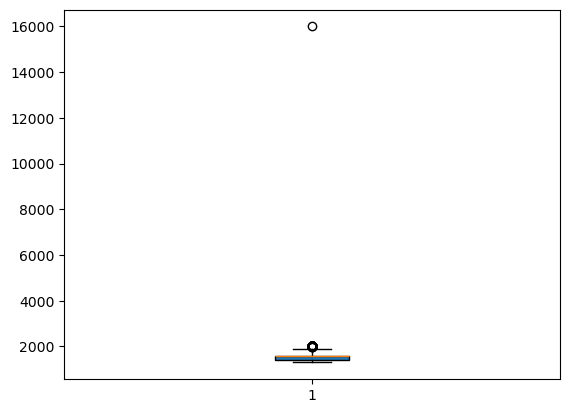

In [28]:
plt.boxplot(data['cc'],patch_artist=True)

In [29]:
data['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [30]:
data['cc'].nunique()

13

In [31]:
data[data['cc']==16000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
80,18950,25,20019,2,110,1,16000,5,5,1180


#### Here it is an outlier son we can remove this

In [32]:
data.drop(80,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x211715ad010>,
 'caps': [<matplotlib.lines.Line2D at 0x211715ad490>,
 'boxes': [<matplotlib.patches.PathPatch at 0x211715accb0>],
 'medians': [<matplotlib.lines.Line2D at 0x211715ada00>],
 'fliers': [<matplotlib.lines.Line2D at 0x211715add00>],
 'means': []}

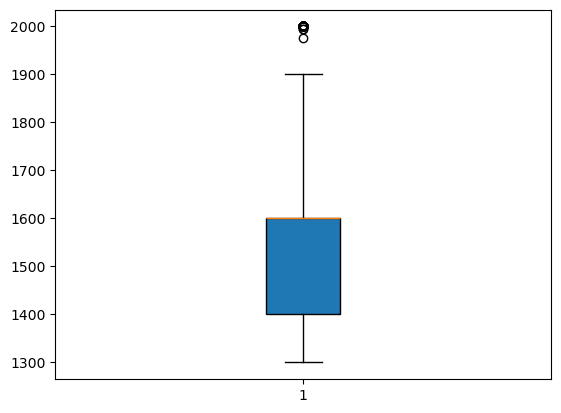

In [33]:
plt.boxplot(data['cc'],patch_artist=True)

#### After that we got less outliers

In [34]:
correlation=data.corr()
correlation

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876059,-0.568724,-0.016476,0.313836,0.027594,0.159904,0.182385,0.064171,0.574483
Age,-0.876059,1.000000,0.503851,0.076871,-0.154800,0.036396,-0.129482,-0.145941,-0.005799,-0.465226
KM,-0.568724,0.503851,1.000000,-0.424065,-0.332623,-0.078963,0.305675,-0.034308,0.014772,-0.022152
Fuel_Type,-0.016476,0.076871,-0.424065,1.000000,0.411897,0.068853,-0.646301,-0.025600,0.069598,-0.503756
HP,0.313836,-0.154800,-0.332623,0.411897,1.000000,0.011753,0.049366,0.091444,0.209722,0.086464
Automatic,0.027594,0.036396,-0.078963,0.068853,0.011753,1.000000,-0.069990,-0.030600,-0.098764,0.052972
cc,0.159904,-0.129482,0.305675,-0.646301,0.049366,-0.069990,1.000000,0.125329,0.041015,0.650814
Doors,0.182385,-0.145941,-0.034308,-0.025600,0.091444,-0.030600,0.125329,1.000000,-0.160060,0.300827
Gears,0.064171,-0.005799,0.014772,0.069598,0.209722,-0.098764,0.041015,-0.160060,1.000000,0.021472
Weight,0.574483,-0.465226,-0.022152,-0.503756,0.086464,0.052972,0.650814,0.300827,0.021472,1.000000


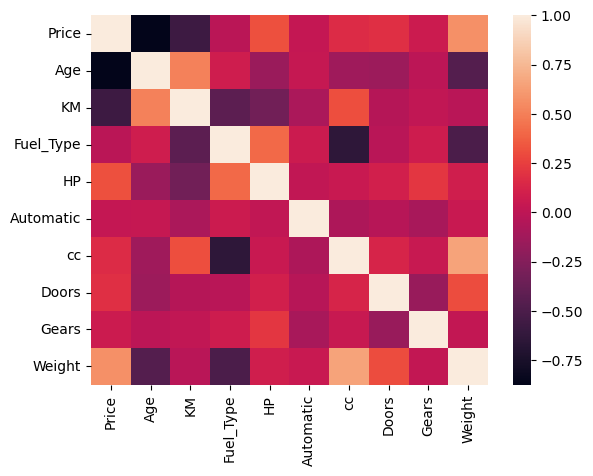

In [35]:
sns.heatmap(correlation)
plt.show()

#####
Price decreases with Age and KM
→ Older cars and higher mileage reduce the car’s resale value.

Price increases with HP, CC, and Weight
→ More powerful, larger, and heavier cars usually cost more.

Automatic cars may have slightly higher prices
→ Being a premium feature, automatics can add value.

HP and CC are highly correlated
→ Bigger engines produce more horsepower — may cause multicollinearity.

Age and KM are often related
→ Older cars usually have higher mileage — another multicollinearity risk.

In [36]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170


In [37]:
X=data.iloc[:,1:9]
y=data.iloc[:,0]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1147, 8), (287, 8), (1147,), (287,))

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model1=LinearRegression()
model1.fit(X,y)

LinearRegression()

In [42]:
yhat_train=model1.predict(X_train)
yhat_train

array([11171.89653373, 11455.36686892,  6049.22226842, ...,
        7351.99833039,  9603.30340747,  7203.17911201])

In [43]:
model1.coef_
np.round((model1.coef_)/10,2)

array([-14.32,  -0.  , -53.94,   3.35,  83.89,   0.15,  20.39,  92.02])

In [44]:
data.corr()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876059,-0.568724,-0.016476,0.313836,0.027594,0.159904,0.182385,0.064171,0.574483
Age,-0.876059,1.000000,0.503851,0.076871,-0.154800,0.036396,-0.129482,-0.145941,-0.005799,-0.465226
KM,-0.568724,0.503851,1.000000,-0.424065,-0.332623,-0.078963,0.305675,-0.034308,0.014772,-0.022152
Fuel_Type,-0.016476,0.076871,-0.424065,1.000000,0.411897,0.068853,-0.646301,-0.025600,0.069598,-0.503756
HP,0.313836,-0.154800,-0.332623,0.411897,1.000000,0.011753,0.049366,0.091444,0.209722,0.086464
Automatic,0.027594,0.036396,-0.078963,0.068853,0.011753,1.000000,-0.069990,-0.030600,-0.098764,0.052972
cc,0.159904,-0.129482,0.305675,-0.646301,0.049366,-0.069990,1.000000,0.125329,0.041015,0.650814
Doors,0.182385,-0.145941,-0.034308,-0.025600,0.091444,-0.030600,0.125329,1.000000,-0.160060,0.300827
Gears,0.064171,-0.005799,0.014772,0.069598,0.209722,-0.098764,0.041015,-0.160060,1.000000,0.021472
Weight,0.574483,-0.465226,-0.022152,-0.503756,0.086464,0.052972,0.650814,0.300827,0.021472,1.000000


In [48]:
yhat_test=model1.predict(X_test)

### Evaluate the model

In [51]:
from sklearn.metrics import mean_squared_error,r2_score


### Training metrics

In [50]:
train_mse=mean_squared_error(y_train,yhat_train)
train_rmse=np.sqrt(train_mse)
train_r2=r2_score(y_train,yhat_train)
np.round(train_mse,2),np.round(train_rmse,2),np.round(train_r2*100,2)

(2319162.08, 1522.88, 82.8)

### Testing metrics

In [73]:
test_mse=mean_squared_error(y_test,yhat_test)
test_rmse=np.sqrt(test_mse)
test_r2=r2_score(y_test,yhat_test)
np.round(test_mse,2),np.round(test_rmse,2),np.round(test_r2*100,2)

(1987617.05, 1409.83, 81.81)

### Residual analysis

In [ ]:
import statsmodels.api as sm

In [ ]:
model_resid=y_test-yhat_test

In [ ]:
plt.figure(figsize=(6,3))
sns.kdeplot(model_resid)
plt.show()

In [ ]:
qqplot=sm.qqplot(model_resid,line='q')
plt.title('Normak Q-Q plot of residuals')
plt.show()

#### Test for homoscedasticity

In [ ]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(get_standardized_values(yhat_test),
            get_standardized_values(model_resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Model2

In [ ]:
import statsmodels.formula.api as smf
mlr=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=data)
model=mlr.fit()

In [ ]:
model.summary()

In [ ]:
#Coefficients
model.params

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

In [ ]:
ml_HP=smf.ols('Price~HP',data=data).fit()


In [ ]:
ml_HP.summary()

In [ ]:
ml_cc=smf.ols('Price~cc',data=data).fit()

In [ ]:
ml_cc.summary()

In [ ]:
ml_AGE=smf.ols('Price~Age',data=data).fit()


In [ ]:
ml_AGE.summary()

In [ ]:
ml_ch=smf.ols('Price~cc+HP',data=data).fit()
ml_ch.summary()

In [ ]:
data.head()

#### Calculating VIF

In [ ]:
rsq_Age=smf.ols('Age~KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_Age=1/(1-rsq_Age)
rsq_KM=smf.ols('KM~Age+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_Fuel=smf.ols('Fuel_Type~Age+KM+HP+Automatic+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_Fuel=1/(1-rsq_Fuel)
rsq_HP=smf.ols('HP~Age+KM+Fuel_Type+Automatic+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_hp=1/(1-rsq_HP)
rsq_Atmtc=smf.ols('Automatic~Age+KM+Fuel_Type+HP+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_Atmtc=1/(1-rsq_Atmtc)
rsq_cc=smf.ols('cc~Age+KM+Fuel_Type+HP+Automatic+Doors+Gears+Weight',data=data).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Doors=smf.ols('Doors~Age+KM+Fuel_Type+HP+Automatic+cc+Gears+Weight',data=data).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Gears=smf.ols('Gears~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Weight',data=data).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_Weight=smf.ols('Weight~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears',data=data).fit().rsquared
vif_Weight=1/(1-rsq_Weight)
d1={'variables':['Age','KM','Fuel_Type','HP','Automatic','cc','Doors','Gears','Weight'],'VIF':[vif_Age,vif_KM,vif_Fuel,vif_hp,vif_Atmtc,vif_cc,vif_Doors,vif_Gears,vif_Weight]}

In [ ]:
VIF_df=pd.DataFrame(d1)
VIF_df

##### cc is correlated with weight

#### Cooks Distance

In [ ]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.show()

In [ ]:
np.argmax(c),np.max(c)

#### High Influence points

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
data.shape


In [ ]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

#### the leverage is very small

In [ ]:
data[data.index.isin([221,960,219])]

#### From the above plot it is evident that data point 219,221,960 are the influencers

#### Improving the model

In [ ]:
data_new.head()

In [ ]:
data.shape

In [ ]:
data1=data_new.drop(data_new.index[[221,960,219]],axis=0).reset_index()
data1

In [ ]:
data1=data1.drop(['index'],axis=1)

In [ ]:
data1.head()

#### Build the model

In [ ]:
final_ml=smf.ols('Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=data1).fit()
final_ml.summary()

### Conclusion
All VIF values are well below 5, which is the common threshold for multicollinearity concern.

No predictor is highly linearly dependent on others.

So there is no multicolinearity problem

#### Model3 Lasso and ridge

#### Lasso

In [55]:
from sklearn.linear_model import Lasso 

In [56]:
X.head()

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears
0,23,46986,1,90,0,2000,3,5
1,23,72937,1,90,0,2000,3,5
2,24,41711,1,90,0,2000,3,5
3,26,48000,1,90,0,2000,3,5
4,30,38500,1,90,0,2000,3,5


In [61]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [57]:
lasso=Lasso(alpha=1.0)
lasso.fit(X,y)

Lasso()

In [65]:
ypred_train=lasso.predict(X_train)
ypred_train

array([11174.02940548, 11463.08131734,  6051.37090709, ...,
        7358.47616968,  9604.69103392,  7205.76785235])

In [76]:
ypred_test=lasso.predict(X_test)
ypred_test

array([13620.64784737, 11812.8105082 , 10858.52229438, 11581.21519998,
       11139.87830464, 13695.48965681, 13247.58323792, 14316.35200386,
       10203.61791184,  8255.26990922,  9486.2216566 ,  6945.47271031,
        7826.05904333, 15838.47771021, 10602.05390719, 11231.0879781 ,
        6738.17995141, 12035.61484549,  8828.56615836,  7753.81973475,
       14586.65125131, 13270.07569327,  8485.60053546, 13315.98283261,
        8528.8051085 , 15116.53398082,  7543.70896784,  9140.32512745,
        9994.71325413, 10636.78017583, 12917.71816144, 15825.01074682,
        7421.81688396,  8590.82604114,  7814.42932296, 11938.03670944,
       13545.41431383, 13870.60776885, 10068.39639256, 18280.05109527,
        7064.30555402,  8338.42774269,  7759.88640207,  9747.24829076,
        5709.54196787,  9757.60197205,  8730.3568561 ,  9796.89019546,
        7462.22612609, 10776.08678778, 11149.26843072, 15491.07916593,
        8156.88830143,  9615.43612647, 11458.42130364, 15954.43147212,
      

#### Training Metrics

In [77]:
mse_train=mean_squared_error(y_train,ypred_train)
rmse_train=np.sqrt(mse_train)
r2_train=r2_score(y_train,ypred_train)
np.round(mse_train,2),np.round(rmse_train,2),np.round(r2_train*100,2)

(2319338.75, 1522.94, 82.8)

#### Testing metrics

In [78]:
mse_test=mean_squared_error(y_test,ypred_test)
rmse_test=np.sqrt(mse_test)
r2_test=r2_score(y_test,ypred_test)
np.round(mse_test,2),np.round(rmse_test,2),np.round(r2_test*100,2)

(1987617.05, 1409.83, 81.81)

#### Ridge

In [80]:
from sklearn.linear_model import Ridge

In [81]:
rid=Ridge()
rid.fit(X,y)

Ridge()

In [82]:
yrhat_train=rid.predict(X_train)

In [83]:
yrhat_test=rid.predict(X_test)

#### Training metrics

In [85]:
mse_train=mean_squared_error(y_train,yrhat_train)
rmse_train=np.sqrt(mse_train)
r2_train=r2_score(y_train,yrhat_train)
np.round(mse_train,2),np.round(rmse_train,2),np.round(r2_train*100,2)

(2319236.98, 1522.9, 82.8)

#### Testing Metrics 

In [86]:
mse_test=mean_squared_error(y_test,yrhat_test)
rmse_test=np.sqrt(mse_test)
r2_test=r2_score(y_test,yrhat_test)
np.round(mse_test,2),np.round(rmse_test,2),np.round(r2_test*100,2)

(1987732.4, 1409.87, 81.81)

#### Conclusion
Lasso and Ridge gave similar MSE and R² scores as basic linear regression.
→ This shows that regularization had little impact.

No multicollinearity or overfitting was present in the dataset.
→ VIF values were low, and the model was already stable.

All features contributed meaningfully to prediction.
→ Lasso did not eliminate any variables.

Regularization strength (alpha) was tested, but no significant improvement was observed.
→ Indicates that the model is already well-optimized.

Conclusion: Lasso and Ridge confirmed that the original model was robust and did not need further penalization.



#### Interview questions

####
1.Normalization and standarzitaion is both used in scaling the data when the scale of the 
data is very large
Normalization can scales the data in the range of 0 to 1 


Standardization can scales the data in the range of -3 to 3

It Ensures that features with large values don’t dominate those with smaller values.

2.The techniques used to address multicollinearity are
  
  Check VIF (Variance Inflation Factor)
  
  Helps identify multicollinearity before modeling.
  
  Ridge Regression reduces impact of correlated predictors.
  
  Lasso Regression can eliminate irrelevant ones by shrinking coefficients to zero.
